In [ ]:
# This notebook contains the answers to the homework exercises. 
# All answers are setup in such a way that the code is broken up into functions and docstrings are added.
# Note, the exercises can be done in different ways, these answers are just examples of correct answers.

#### Exercise 1

In [17]:
# Answer to Exercise 1
# Note, multiple answers are possible, this is just a (very) extended example
import csv
from typing import List, Dict

def read_csv_file(file_path: str) -> List[Dict[str, str]]:
    """
    Read a CSV file and return a list of dictionaries representing the records.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        List[Dict[str, str]]: A list of dictionaries representing the records.
    """
    records = []
    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            records.append(row)
    return records


def calculate_average_grade(records: List[Dict[str, str]]) -> float:
    """
    Calculate the average grade from a list of student records.

    Args:
        records (List[Dict[str, str]]): A list of dictionaries representing the records.

    Returns:
        float: The average grade.
    """
    total = sum(float(record['Grade']) for record in records)
    average = total / len(records)
    return average


def filter_records(records: List[Dict[str, str]], min_grade: float) -> List[Dict[str, str]]:
    """
    Filter records based on a minimum grade.

    Args:
        records (List[Dict[str, str]]): A list of dictionaries representing the records.
        min_grade (float): The minimum grade threshold.

    Returns:
        List[Dict[str, str]]: A filtered list of dictionaries representing the records.
    """
    filtered_records = [record for record in records if float(record['Grade']) >= min_grade]
    return filtered_records


def generate_report(records: List[Dict[str, str]]) -> None:
    """
    Generate a student report based on the given records.

    Args:
        records (List[Dict[str, str]]): A list of dictionaries representing the records.
    """
    print("Student Report")
    print("--------------")
    for record in records:
        print(f"Name: {record['Name']}")
        print(f"Grade: {record['Grade']}")
        print("--------------------")


def main():
    file_path = input("Enter the path to the CSV file: ")
    records = read_csv_file(file_path)

    average_grade = calculate_average_grade(records)
    print(f"Average Grade: {average_grade}")
    print("--------------------")

    filtered_records = filter_records(records, 80.0)
    generate_report(filtered_records)

# Uncomment below if you want to run the functions
# if __name__ == "__main__":
#     main()

#### Exercise 2

In [2]:
# Answer to Exercise 2
import numpy as np
import matplotlib.pyplot as plt
from typing import List
def generate_mandelbrot_set(width: int) -> List[List[int]]:
    """
    Generate the Mandelbrot set as a 2D array of diverging indices.

    Args:
        width (int): The width and height of the image.

    Returns:
        List[List[int]]: A 2D list representing the Mandelbrot set,
            where each element is a diverging index.
    """
    # Create an empty 2D list to store the diverging indices
    mandelbrot_set = [[0] * width for _ in range(width)]

    # Define the x and y ranges
    x_range = np.linspace(-1.5, 0.5, width)
    y_range = np.linspace(-1, 1, width)

    # Iterate over each pixel in the image
    for i in range(width):
        for j in range(width):
            # Convert the pixel coordinates to complex number c
            c = complex(x_range[i], y_range[j])

            # Initialize the variables
            a = 0 + 0j
            diverging_index = 0

            # Iterate the sequence until divergence or maximum iterations reached
            while abs(a) <= 2 and diverging_index < 100:
                a = a * a + c
                diverging_index += 1

            # Store the diverging index in the Mandelbrot set
            mandelbrot_set[i][j] = diverging_index

    return mandelbrot_set


def normalize_diverging_indices(indices: List[List[int]]) -> List[List[float]]:
    """
    Normalize the diverging indices to the range [0, 1] for color representation.

    Args:
        indices (List[List[int]]): The 2D list of diverging indices.

    Returns:
        List[List[float]]: A normalized 2D list of diverging indices in the range [0, 1].
    """
    max_index = max(map(max, indices))
    return [[index / max_index for index in row] for row in indices]


def create_mandelbrot_image(diverging_indices: List[List[float]]) -> np.ndarray:
    """
    Create an image of the Mandelbrot set based on the normalized diverging indices.

    Args:
        diverging_indices (List[List[float]]): The normalized 2D list of diverging indices.

    Returns:
        np.ndarray: A NumPy array representing the image of the Mandelbrot set.
    """
    # Convert the normalized diverging indices to a NumPy array
    image = np.array(diverging_indices)

    # Create a colormap for visualization
    cmap = plt.cm.get_cmap('hot')
    normalized_image = cmap(image)

    return normalized_image


def draw_mandel(width: int) -> None:
    """
    Draw and display the Mandelbrot set image.

    Args:
        width (int): The width and height of the image.

    Returns:
        None
    """
    # Generate the Mandelbrot set
    mandelbrot_set = generate_mandelbrot_set(width)

    # Normalize the diverging indices
    normalized_indices = normalize_diverging_indices(mandelbrot_set)

    # Create the Mandelbrot set image
    image = create_mandelbrot_image(normalized_indices)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, extent=[-1.5, 0.5, -1, 1], cmap='hot')
    plt.title("Mandelbrot Set")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.colorbar()
    plt.show()

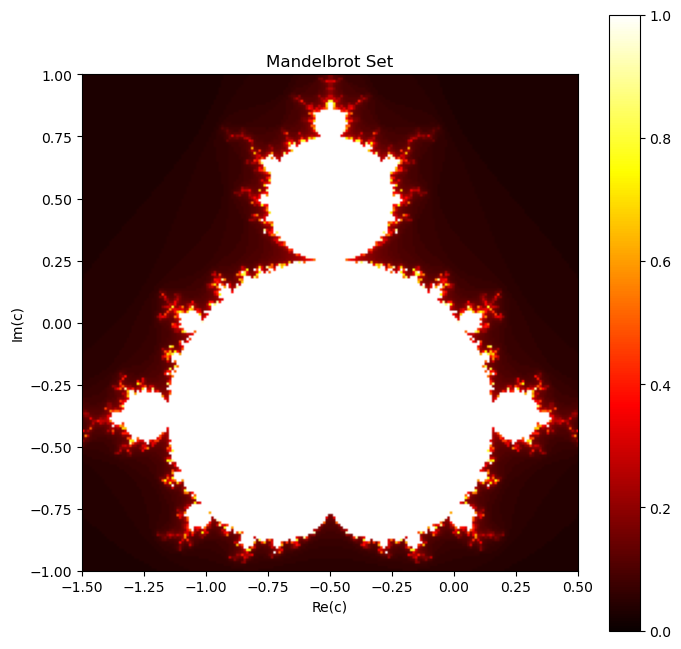

In [3]:
# Example 1
draw_mandel(200)

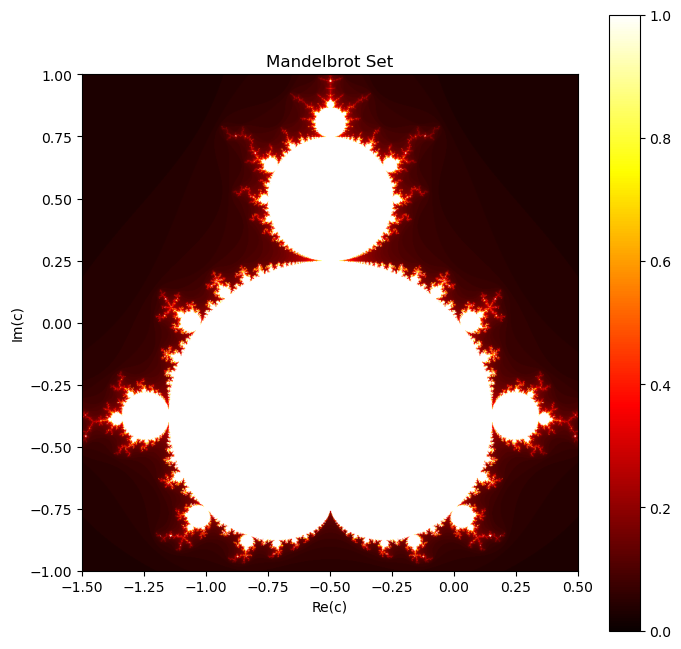

In [4]:
# Example 2
draw_mandel(800)

#### Exercise 3

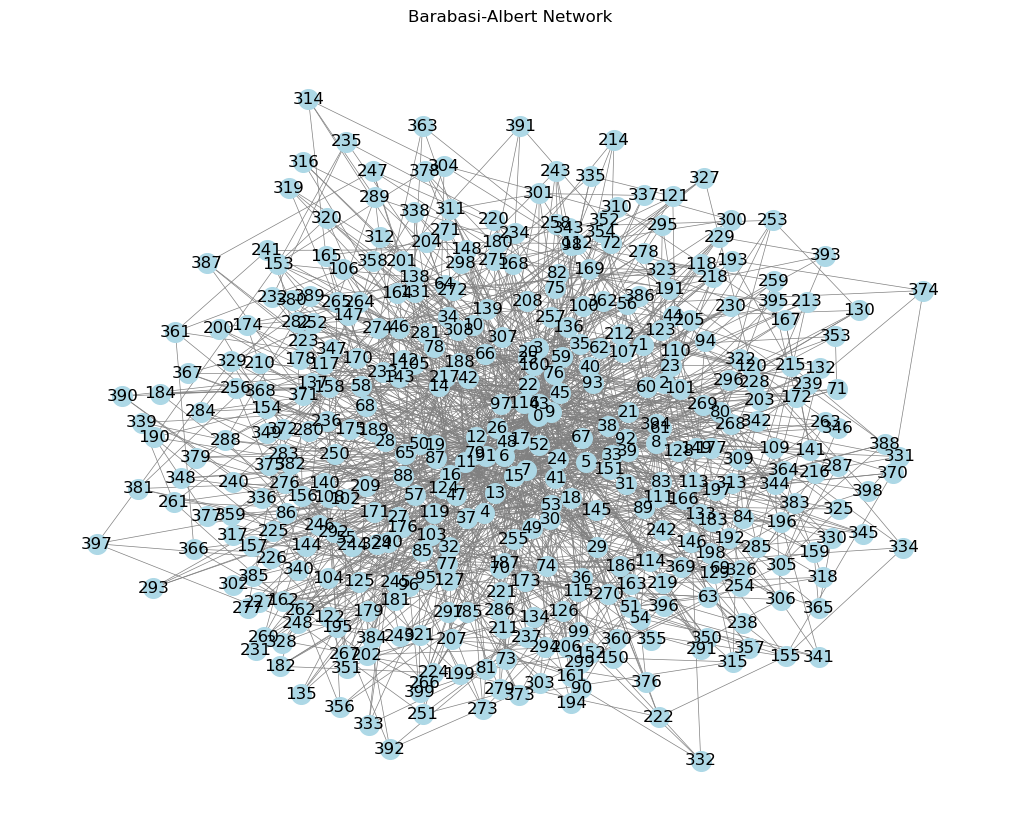

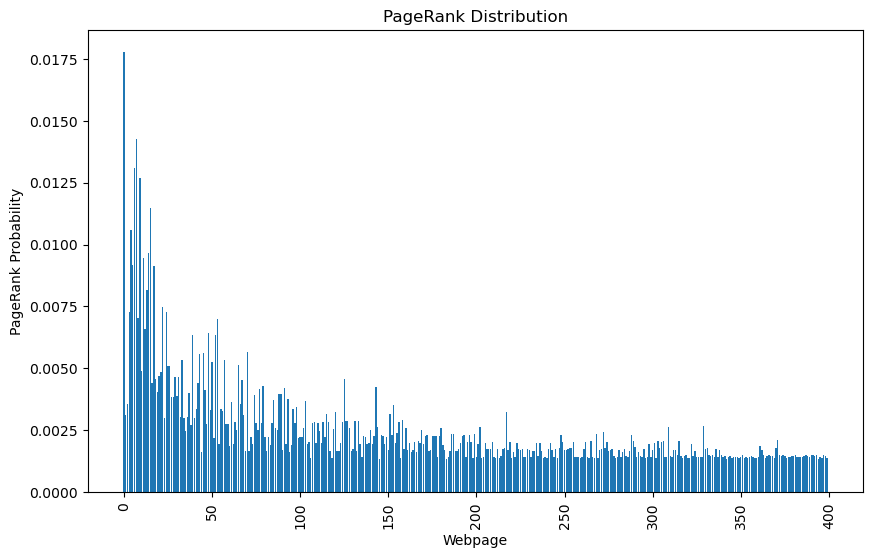

In [16]:
# Exercise 3.1 - answer with docstrings and broken up into different functions
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_barabasi_albert_network(n0: int, N: int, M: int) -> nx.Graph:
    """
    Generate a Barabasi-Albert network with given parameters.

    Args:
        n0 (int): The initial number of nodes in the star network.
        N (int): The total number of webpages in the network.
        M (int): The number of pages to which a new webpage links.

    Returns:
        nx.Graph: The generated Barabasi-Albert network.
    """
    # Create a star network with n0 nodes
    network = nx.star_graph(n0)

    # Iterate until the total number of webpages is reached
    while network.number_of_nodes() < N:
        # Calculate the probability of linking to each existing webpage
        degree_sequence = np.array([network.degree(node) for node in network.nodes()])
        probabilities = degree_sequence / degree_sequence.sum()

        # Choose M existing webpages to link from based on the probabilities
        chosen_nodes = np.random.choice(network.nodes(), size=M, replace=False, p=probabilities)

        # Add a new webpage and connect it to the chosen webpages
        new_node = network.number_of_nodes()
        network.add_node(new_node)
        network.add_edges_from([(new_node, node) for node in chosen_nodes])

    return network


def visualize_network(network: nx.Graph) -> None:
    """
    Visualize the generated network.

    Args:
        network (nx.Graph): The generated Barabasi-Albert network.

    Returns:
        None
    """
    pos = nx.spring_layout(network)
    plt.figure(figsize=(10, 8))
    nx.draw(network, pos, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray', width=0.5)
    plt.title("Barabasi-Albert Network")
    plt.axis('off')
    plt.show()


def visualize_pagerank(network: nx.Graph) -> None:
    """
    Visualize the distribution of PageRank probabilities.

    Args:
        network (nx.Graph): The generated Barabasi-Albert network.

    Returns:
        None
    """
    pagerank = nx.pagerank(network)

    nodes = list(pagerank.keys())
    pr_values = list(pagerank.values())

    plt.figure(figsize=(10, 6))
    plt.bar(nodes, pr_values)
    plt.xlabel("Webpage")
    plt.ylabel("PageRank Probability")
    plt.title("PageRank Distribution")
    plt.xticks(rotation=90)
    plt.show()

# Example 
# Generate the Barabasi-Albert network
n0 = 5
N = 400
M = 4
network = generate_barabasi_albert_network(n0, N, M)

# Visualize the network
visualize_network(network)

# Visualize the PageRank distribution
visualize_pagerank(network)


C:\Users\873446\AppData\Local\Temp\ipykernel_16644\1966383781.py:48: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return nx.pagerank_numpy(graph)
C:\Users\873446\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


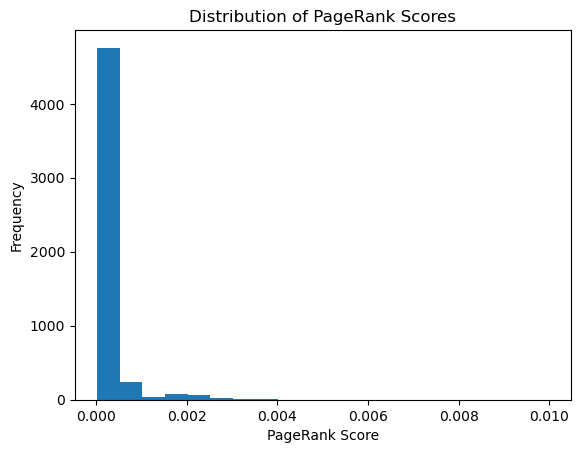

In [18]:
# Exercise 3.2
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def load_edges(file_path):
    """
    Load the edge data from the specified CSV file.

    Args:
        file_path (str): Path to the CSV file containing the edge data.

    Returns:
        List[Tuple[str, str]]: List of edges, where each edge is represented as a tuple (source, target).
    """
    edges = []
    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            edges.append((row[0], row[1]))
    return edges

def create_directed_graph(edges):
    """
    Create a directed graph from the given edges.

    Args:
        edges (List[Tuple[str, str]]): List of edges, where each edge is represented as a tuple (source, target).

    Returns:
        nx.DiGraph: Directed graph representing the network.
    """
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    return graph

def calculate_pagerank(graph):
    """
    Calculate the PageRank of the nodes in the given graph.

    Args:
        graph (nx.DiGraph): Directed graph representing the network.

    Returns:
        Dict[str, float]: Dictionary mapping each node to its PageRank score.
    """
    return nx.pagerank_numpy(graph)

def visualize_pagerank_distribution(pagerank_scores):
    """
    Visualize the distribution of PageRank scores.

    Args:
        pagerank_scores (Dict[str, float]): Dictionary mapping each node to its PageRank score.
    """
    scores = list(pagerank_scores.values())
    plt.hist(scores, bins=20)
    plt.xlabel('PageRank Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of PageRank Scores')
    plt.show()

# Load the edge data
file_path = "squirrel_edges.csv"
edges = load_edges(file_path)

# Create the directed graph
network = create_directed_graph(edges)

# Calculate the PageRank scores
pagerank_scores = calculate_pagerank(network)

# Visualize the distribution of PageRank scores
visualize_pagerank_distribution(pagerank_scores)
